In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
X = pd.read_csv("wine-clustering.csv")

In [3]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Problem 1
Exploratory Data Analysis

In [10]:
X.shape

(178, 13)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Data has only float and integer values.

In [6]:
X.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
X.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

### Checking for na values

In [9]:
X.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### As we can see, there is no missing data

In [11]:
# highest - lowest alcohol values
X.sort_values("Alcohol",ascending=False).head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
13,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
46,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
56,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970


In [12]:
# highest - lowest Magnesium values
X.sort_values("Magnesium",ascending=False).head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
96,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
33,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235
39,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


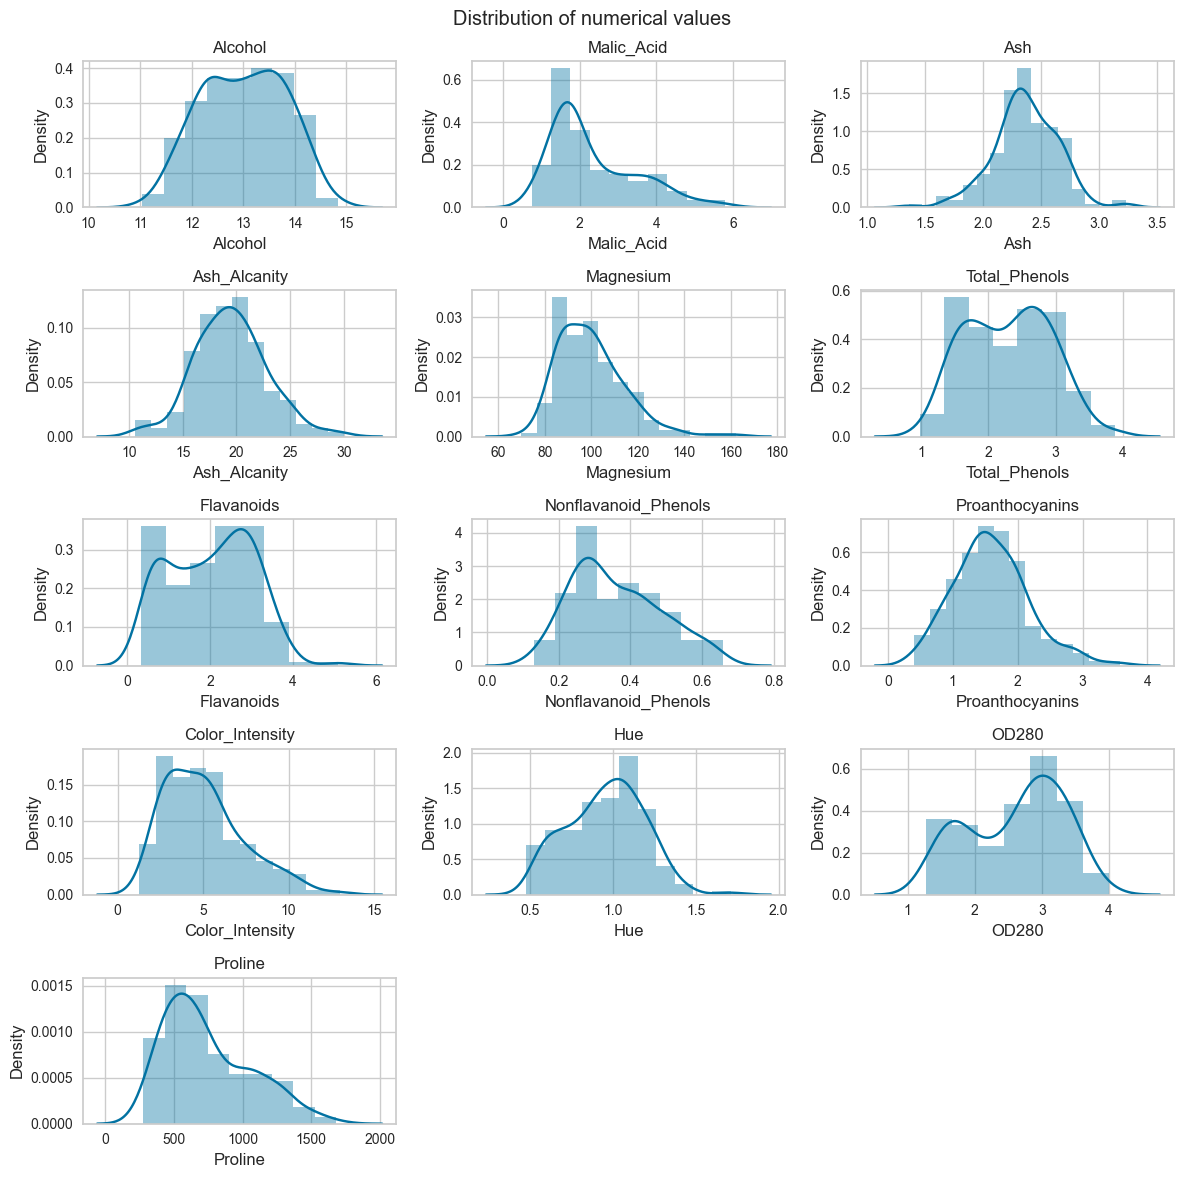

In [16]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("Distribution of numerical values")


for i in X:
    plt.subplot(5,3,k)   
    sns.distplot(X[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

### There are not many noticeable outliers, let's observe with boxplot now

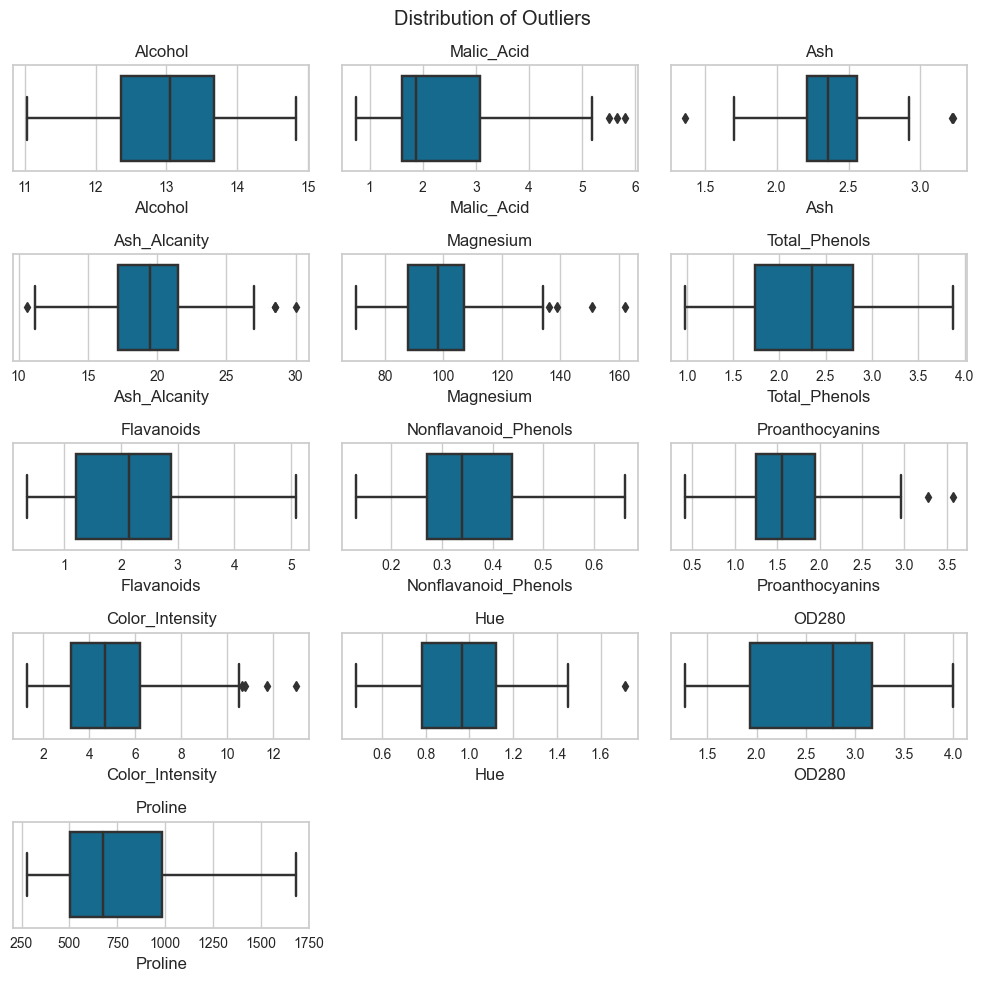

In [17]:
k=1
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Outliers")

for i in X:
    plt.subplot(5,3,k)
    sns.boxplot(x = i, data = X)
    plt.title(i)
    plt.tight_layout()
    k+=1

### As can be seen very few outliers (25-75 quartiles)

<Figure size 2500x2500 with 0 Axes>

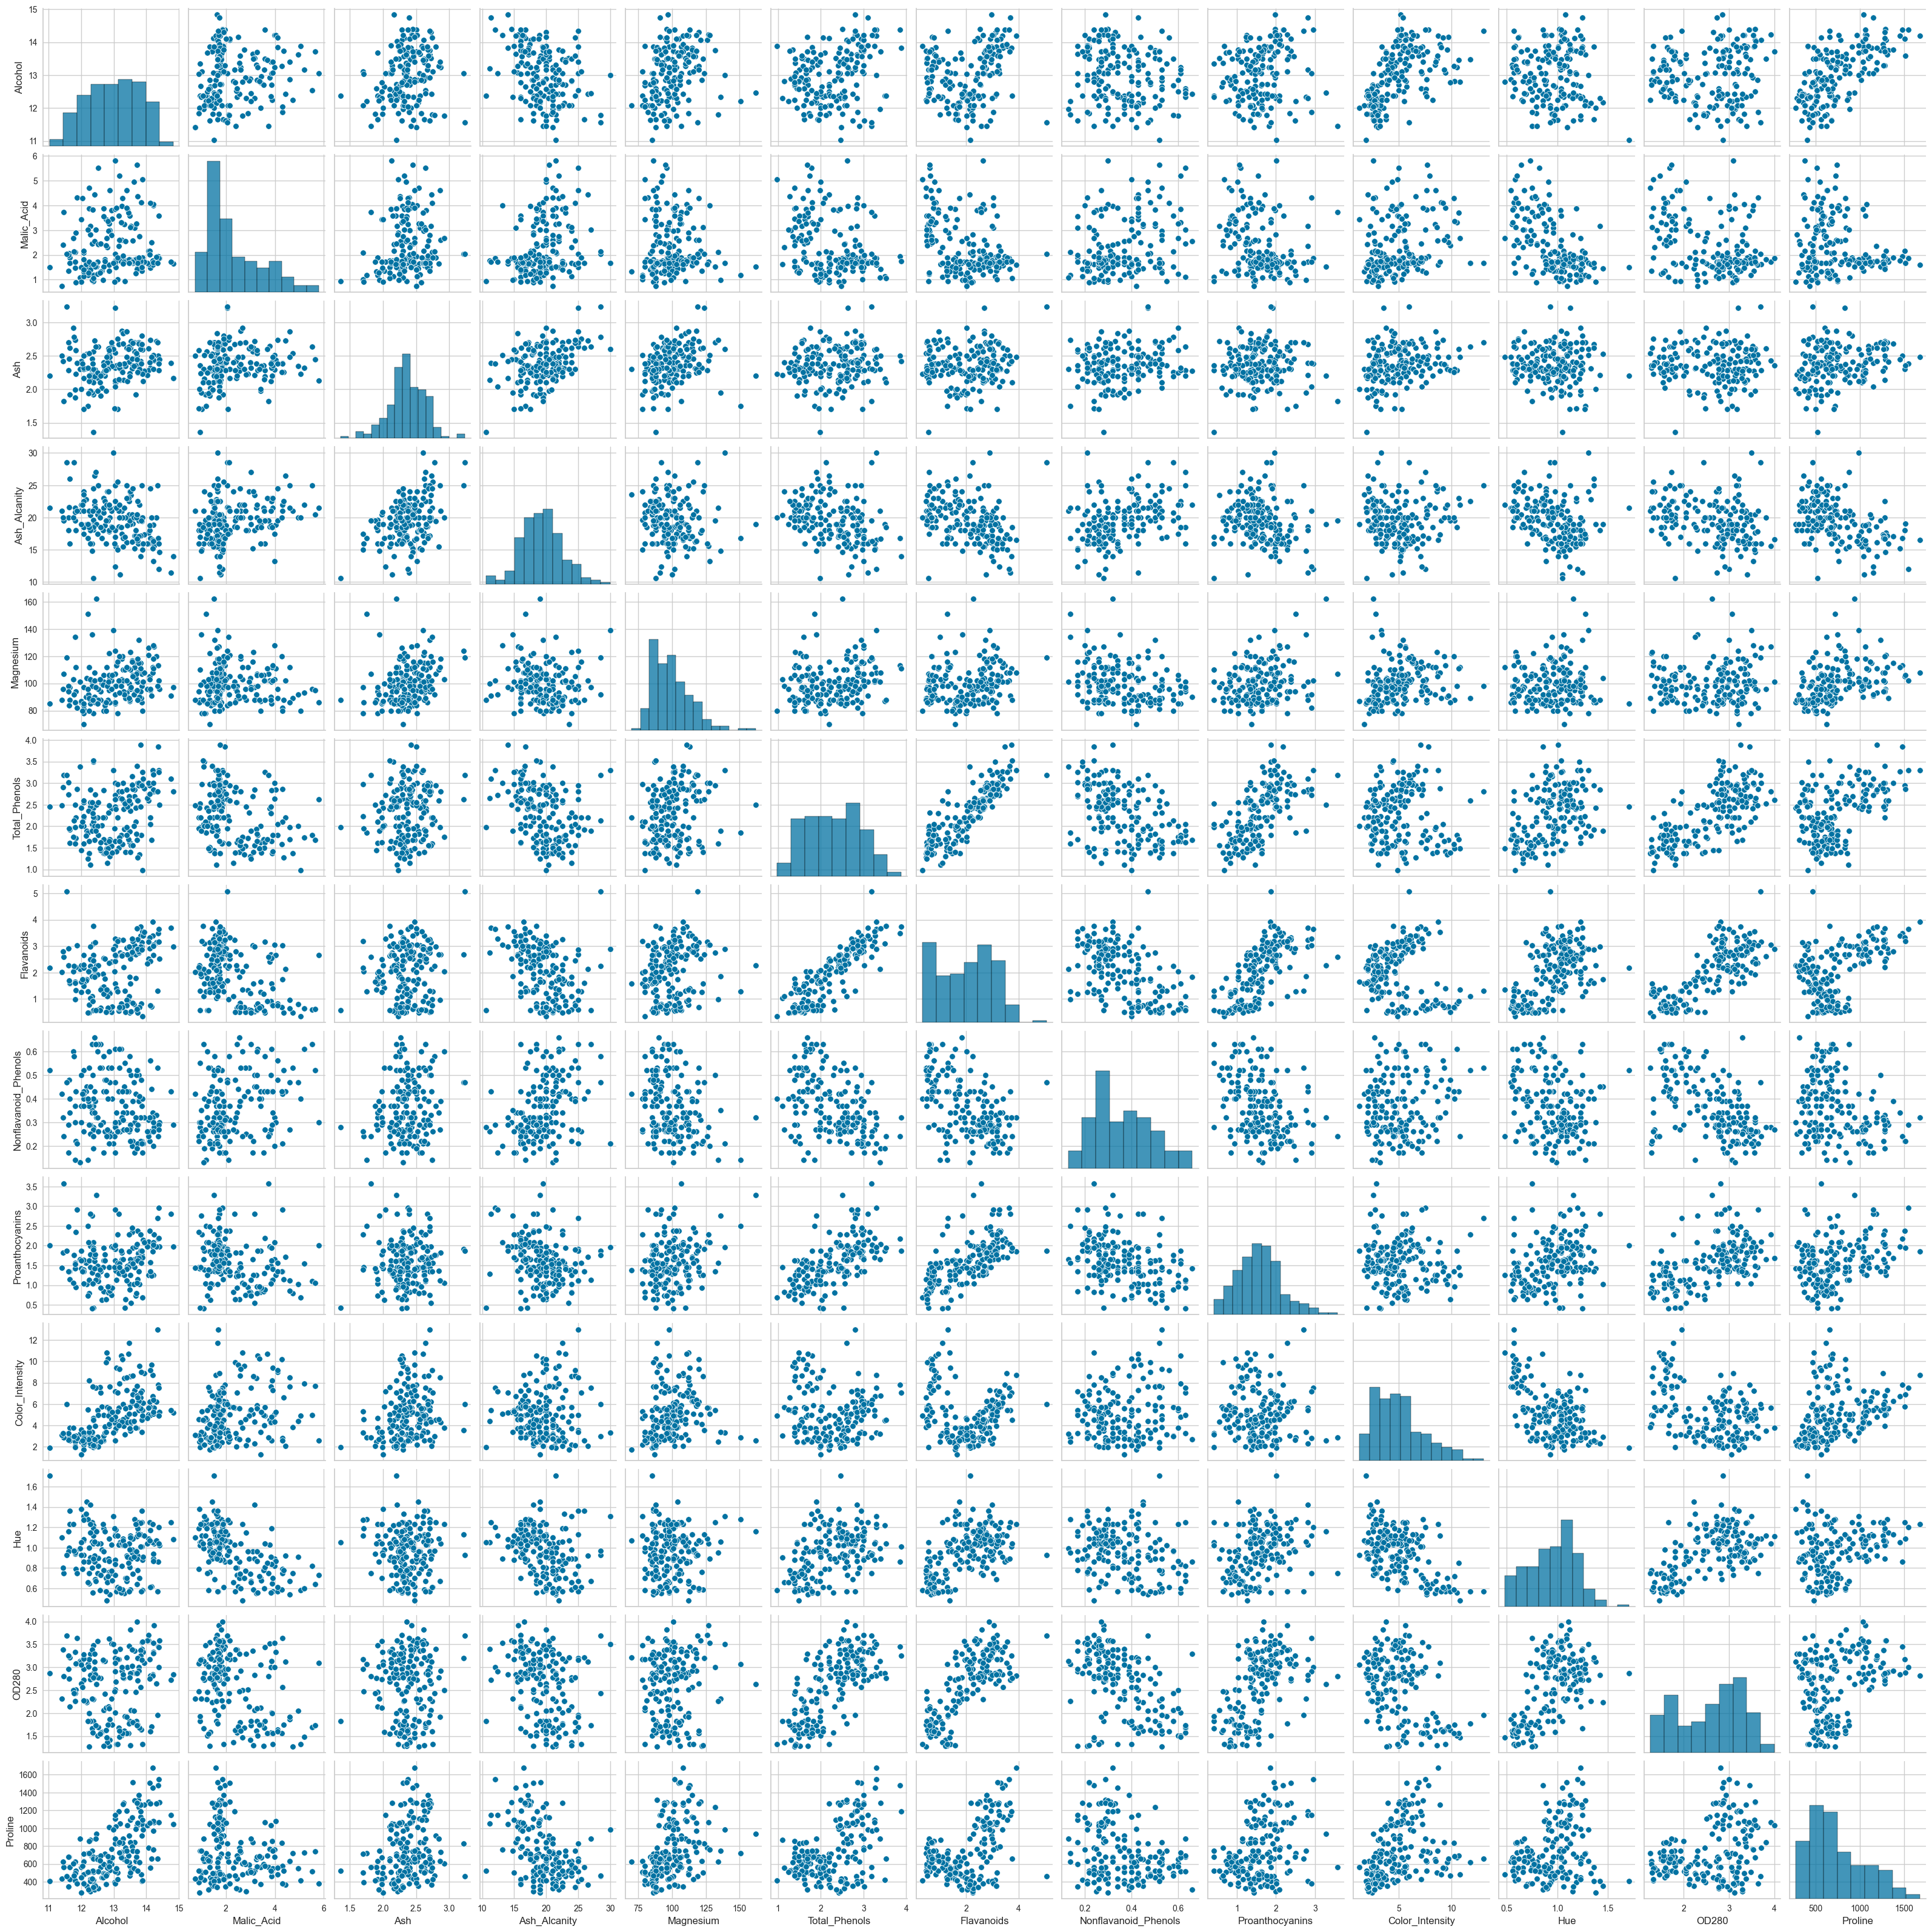

In [18]:
plt.figure(figsize=(25,25))
sns.pairplot(X)
plt.show()

### Above pairplot shows the relationship among various features for all the possible pair of features.

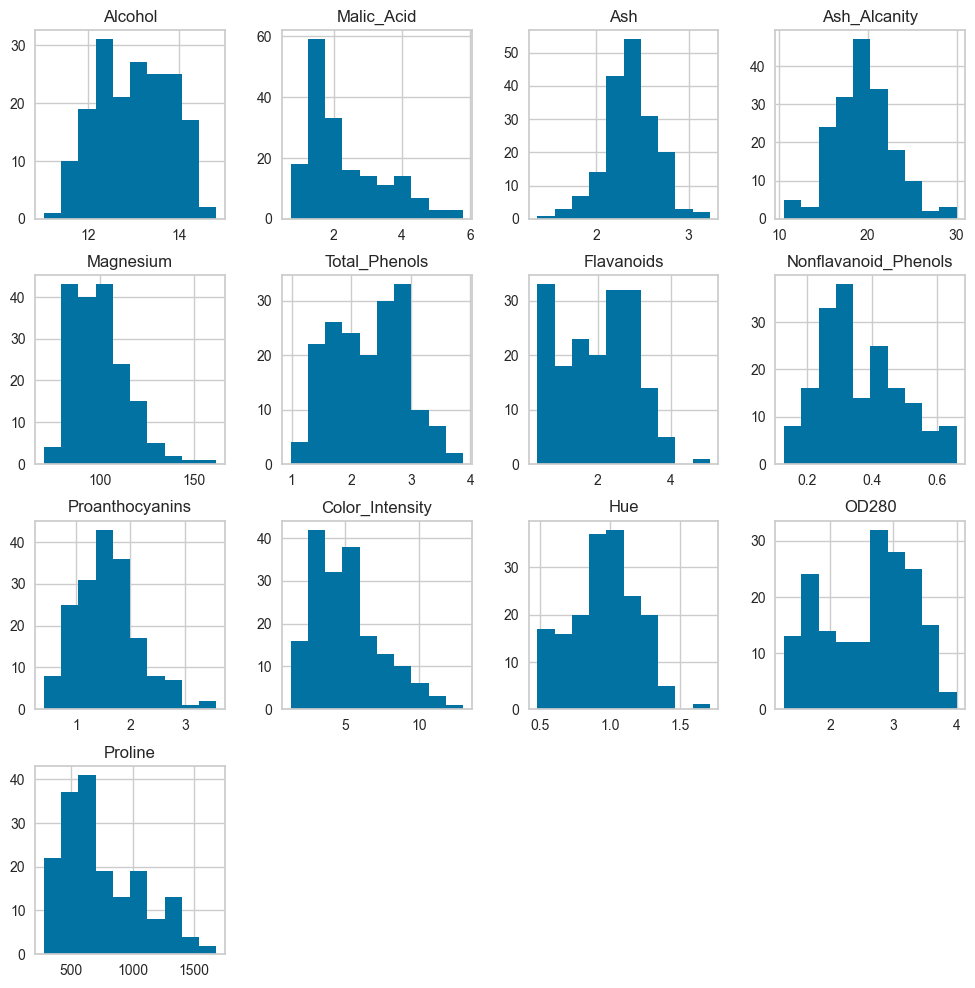

In [19]:
X.hist(figsize=(12,12));

### Correlation checking

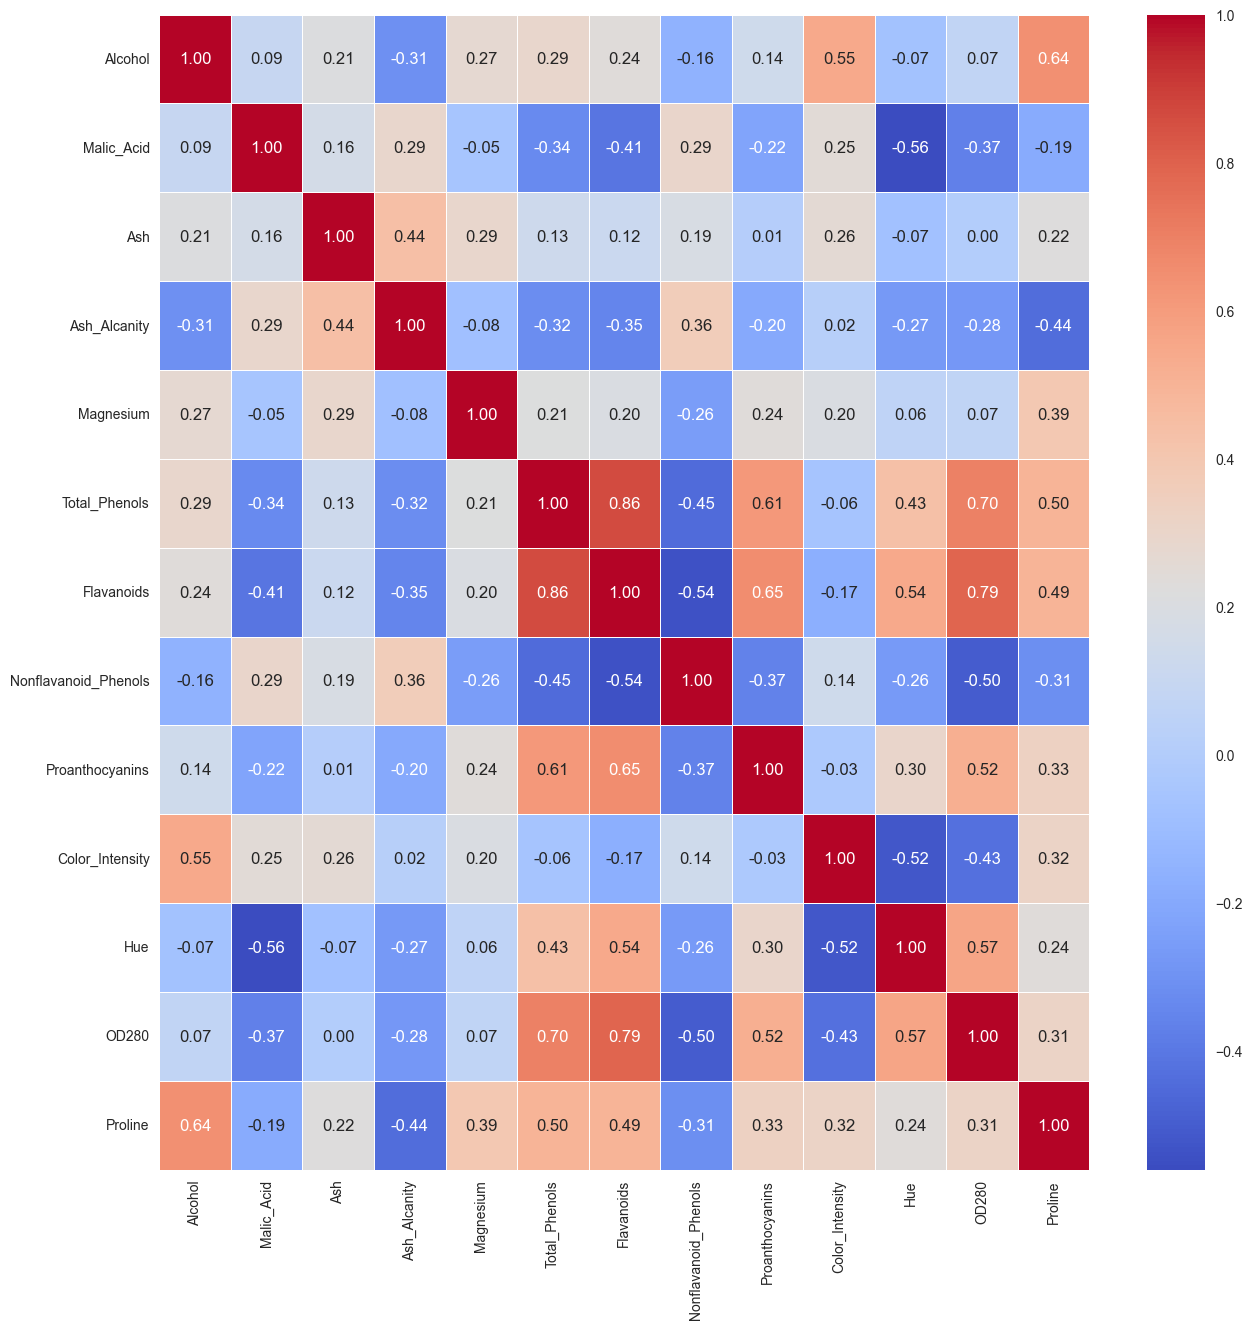

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

Total_phenols has a strong positive correlation with Flavanoids

Hue and Malic_Adid have strong negative correlation

Flavanoids has a strong positive correlation with OD280

Flavanoids has a strong negative correlation with Nonflavanoid_Phenols

Proline and Alcohol have positive correlation

## Problem 2
Apply GMMs, k-means, and k-medoids clustering algorithms on the Wine dataset. Use the scikit-learn library to implement these algorithms.

In [21]:
model_kmeans = KMeans(n_clusters = 3)
print(model_kmeans)

KMeans(n_clusters=3)


In [22]:
model_groups = model_kmeans.fit(X)
model_groups.cluster_centers_

array([[1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

In [23]:
print("Shapes of model group clustes: %s" % str(model_groups.cluster_centers_.shape))

Shapes of model group clustes: (3, 13)


In [24]:
clusters = model_groups.fit_predict(X)
print("Number of unique clusters: %s" % np.unique(clusters))

Number of unique clusters: [0 1 2]


In [25]:
model_kmedoids = KMedoids(n_clusters=3, random_state=42)
clusters_medoids= model_kmedoids.fit_predict(X)

In [26]:
print("Number of unique clusters: %s" % np.unique(clusters_medoids))

Number of unique clusters: [0 1 2]


In [27]:
model_gmm = GaussianMixture(n_components=3).fit(X)
clusters_gmm = model_gmm.predict(X)

In [28]:
print("Number of unique clusters: %s" % np.unique(clusters_gmm))

Number of unique clusters: [0 1 2]


### Problem 3

Experiment with data feature scaling for all three algorithms, resulting at least six kind of experiments (3 models, scaling vs no-scaling). You can choose any kind of scaling that you find useful for your features.

In [29]:
scaler = StandardScaler()
X_standard_scaled = scaler.fit_transform(X)

In [30]:
X.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [31]:
X_scaled_df = pd.DataFrame(X_standard_scaled, columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])

In [32]:
X_scaled_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [33]:
X_scaled_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [34]:
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

In [35]:
X_normalized_df = pd.DataFrame(X_normalized, columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])
X_normalized_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [36]:
X_normalized_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Models on standard normalized dataset

In [37]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_clusters_norm = kmeans_model.fit_predict(X_scaled_df)
kmeans_clusters_norm

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [38]:
kmedoids_model = KMedoids(n_clusters=3, random_state=42)
medoids_clusters= kmedoids_model.fit_predict(X_scaled_df)
medoids_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [40]:
gmm_model = GaussianMixture(n_components=3)
gmm_clusters = gmm_model.fit_predict(X_scaled_df)
gmm_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

### Models on minmax standardized dataset

In [45]:
kmeans_model_norm = KMeans(n_clusters = 3)
kmeans_clusters = kmeans_model_norm.fit_predict(X_normalized_df)
kmeans_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [42]:
kmedoids_model_norm = KMedoids(n_clusters=3, random_state=42)
medoids_clusters_norm = kmedoids_model_norm.fit_predict(X_normalized_df)
medoids_clusters_norm

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1,
       2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [50]:
gmm_model_norm = GaussianMixture(n_components=3)
gmm_clusters_norm = gmm_model_norm.fit_predict(X_normalized_df)
gmm_clusters_norm

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

### Problem 4
**Determine the optimal number of clusters for k-means and k-medoids using the silhouette or other score. Evaluate the clustering results using silhouette or other scores. Compare the scores to determine which algorithm performs better on the Wine dataset.**

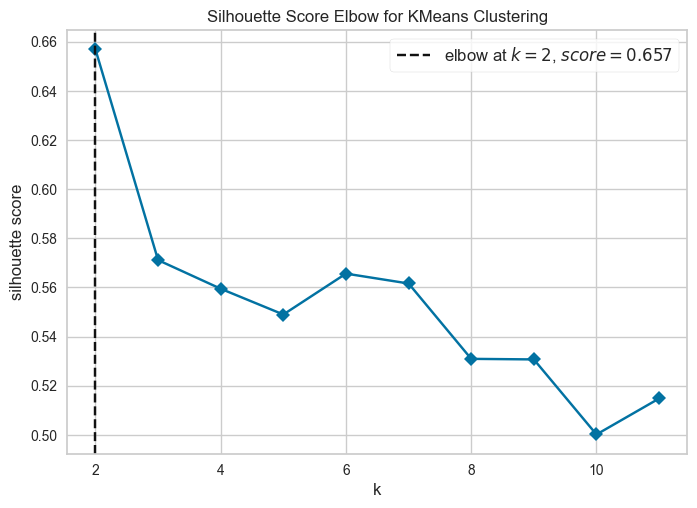

In [52]:
KMEANS_model = KMeans()

visualizer = KElbowVisualizer(
    KMEANS_model, k=(2,12), metric='silhouette', timings=False
)

visualizer.fit(X)    
visualizer.poof()   
plt.show()

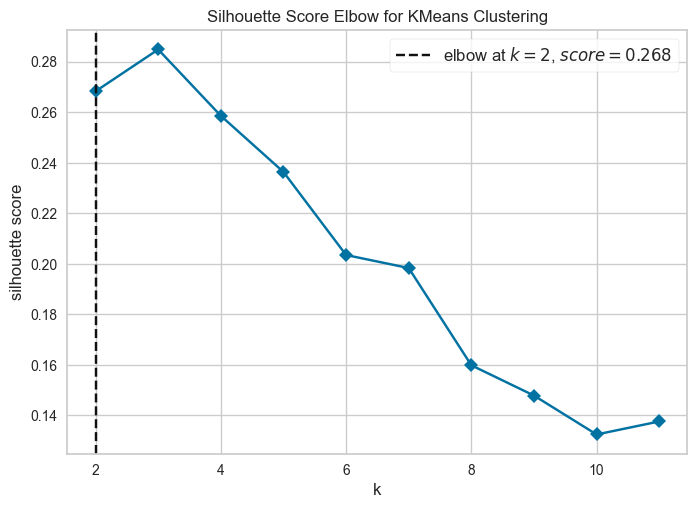

In [56]:
KMEANS_model = KMeans()

visualizer = KElbowVisualizer(
    KMEANS_model, k=(2,12), metric='silhouette', timings=False
)

visualizer.fit(X_scaled_df)    
visualizer.poof() 
plt.show()

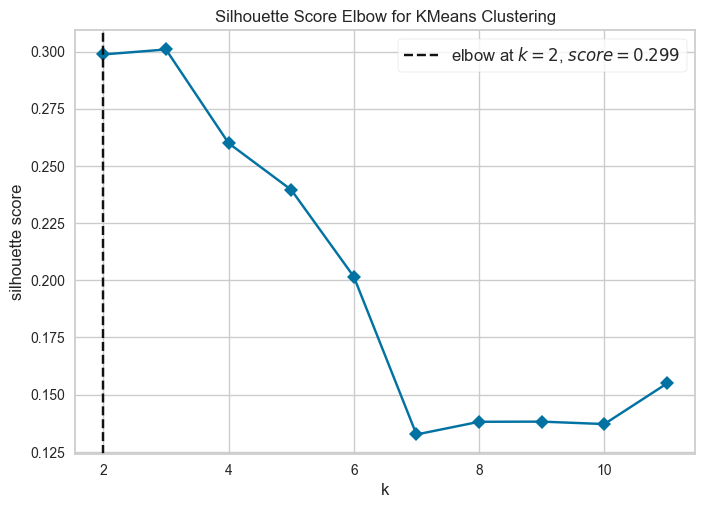

In [54]:
KMEANS_model = KMeans()

visualizer = KElbowVisualizer(
    KMEANS_model, k=(2,12), metric='silhouette', timings=False
)

visualizer.fit(X_normalized_df)    
visualizer.poof()   
plt.show()

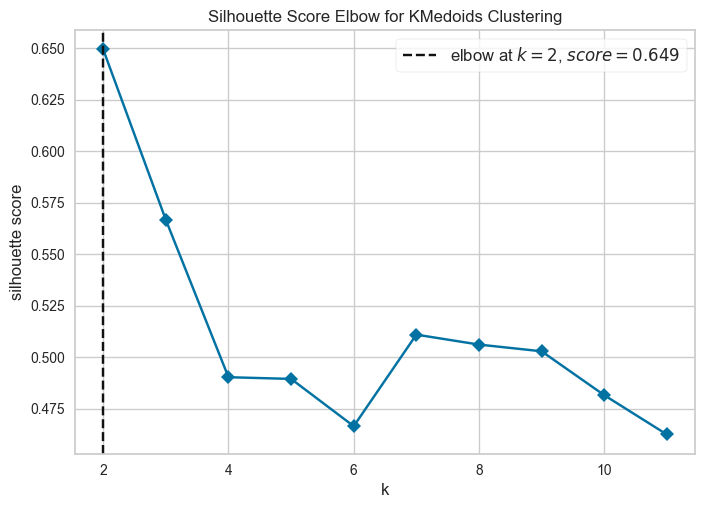

In [27]:
KMedoids_model = KMedoids()

visualizer = KElbowVisualizer(
    KMedoids_model, k=(2,12), metric='silhouette', timings=False
)

visualizer.fit(X)    
visualizer.poof()   
plt.show()

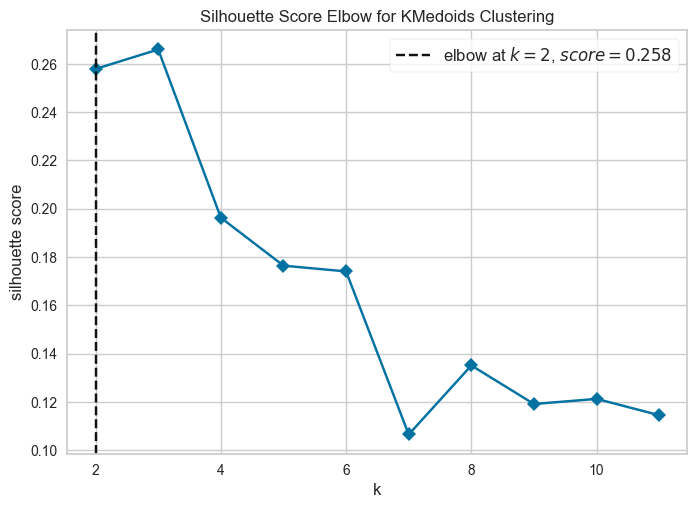

In [57]:
KMedoids_model = KMedoids()

visualizer = KElbowVisualizer(
    KMedoids_model, k=(2,12), metric='silhouette', timings=False
)

visualizer.fit(X_scaled_df)    
visualizer.poof()   
plt.show()

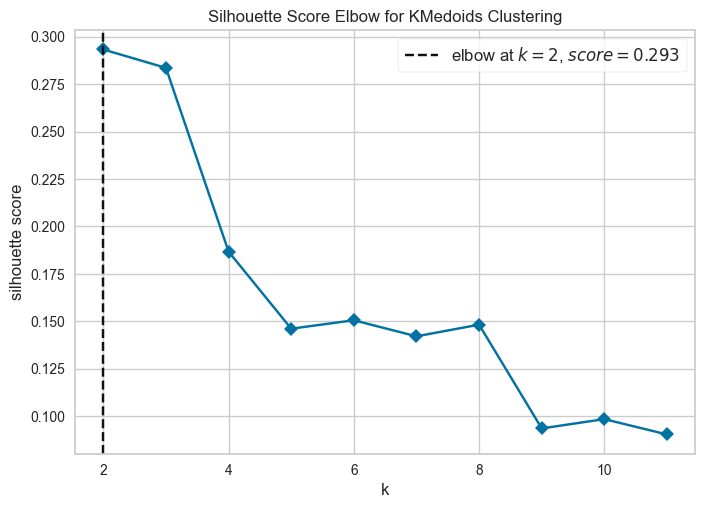

In [58]:
KMedoids_model = KMedoids()

visualizer = KElbowVisualizer(
    KMedoids_model, k=(2,12), metric='silhouette', timings=False
)

visualizer.fit(X_normalized_df)    
visualizer.poof()   
plt.show()

### As we can see, KMeans algorithm better performs on the Wine dataset than KMedoids algorithms based on Silhouette Score when k = 2 and without using any kind of scaling

### Problem 5
**Fit GMMs with different numbers of components (clusters) to the Wine dataset. Use grid search and the Bayesian Information Criterion (BIC) to determine the optimal number of clusters.**

In [66]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(2, 12),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score 
)

In [67]:
grid_search.fit(X)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(2, 12)},
             scoring=<function gmm_bic_score at 0x000001E77511C790>)

In [68]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
21,3,diag,1895.774165
20,2,diag,1953.602068
22,4,diag,1971.555474
10,2,tied,2061.732002
23,5,diag,2064.732318


In [69]:
grid_search.fit(X_scaled_df)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(2, 12)},
             scoring=<function gmm_bic_score at 0x000001E77511C790>)

In [70]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
2,4,spherical,1453.595685
1,3,spherical,1471.648788
0,2,spherical,1508.643323
3,5,spherical,1513.857536
4,6,spherical,1571.645284


In [71]:
grid_search.fit(X_normalized_df)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(2, 12)},
             scoring=<function gmm_bic_score at 0x000001E77511C790>)

In [72]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
1,3,spherical,-93.047326
2,4,spherical,-43.079912
3,5,spherical,-0.725879
0,2,spherical,41.335549
4,6,spherical,56.397493


The model with a more negative BIC score is preferred over a model with a less negative (or positive) BIC score.

#### Using grid search and the Bayesian Information Criterion (BIC), since all models despite the fact of data scaling,  the optimal number of components is 3

### Problem 6
**Plot the BIC values for each model and analyze the results to choose the best model. Discuss the advantages and disadvantages of using BIC for model selection and the implications of your choice for the Wine dataset.**

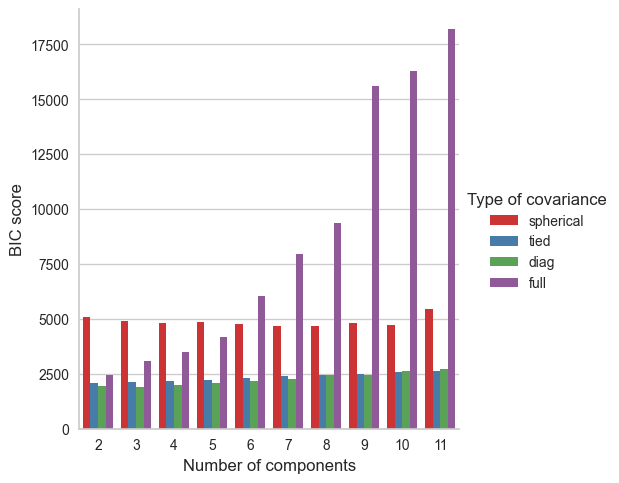

In [53]:
sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
    palette="Set1"
)
plt.show()

The Bayesian Information Criterion (BIC) is a model selection criterion that is commonly used to compare models based on their likelihood and complexity.

Advantages of using BIC for model selection:

1) BIC takes into account both the likelihood of the data and the complexity of the model, thus penalizing overfitting and avoiding underfitting.
2) BIC is a consistent estimator, meaning that as the sample size n increases, the probability of selecting the true model approaches 1.
3) BIC is easy to compute and can be used for a wide range of models, including linear regression, logistic regression, and other generalized linear models.

Disadvantages of using BIC for model selection:

1) BIC assumes that the true model is in the candidate set of models being considered, which may not be the case in practice.
2) BIC may not be appropriate for models with small sample sizes, as the penalty term can dominate the likelihood term.
3) BIC may not be appropriate for models with unequal prior probabilities, as it assumes that all models are equally likely a priori.

For the Wine dataset, which contains measurements of different wine varieties, BIC can be used to compare different models that predict the wine quality based on the measured variables. For example, one can compare a linear regression model with all variables included to a model with only a subset of variables included. By computing the BIC for each model, one can choose the model with the lowest BIC as the best model. However, it is important to keep in mind the advantages and disadvantages of using BIC and to interpret the results with caution.

### Problem 7
**Visualize the cluster assignments produced by each algorithm and analyze the results (you can choose 0 and 1 features, or any pair of features which are visually more informative). Discuss the strengths and weaknesses of each clustering algorithm (3 of them) in the context of the Wine dataset.**

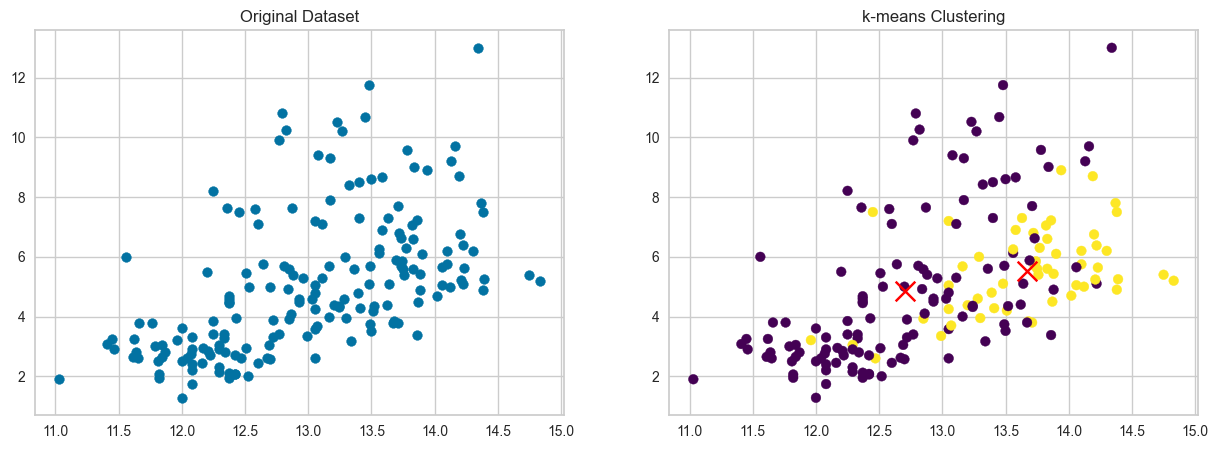

In [77]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
y_pred = kmeans.fit_predict(X)

plt.figure(figsize = (15,5))

plt.subplot(121)
plt.scatter(X.iloc[:,0],X.iloc[:,9])
plt.title("Original Dataset")

plt.subplot(122)
plt.scatter(X.iloc[:, 0], X.iloc[:, 9], c = kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 9], c='red', marker='x', s=200)
plt.title("k-means Clustering")
plt.show()

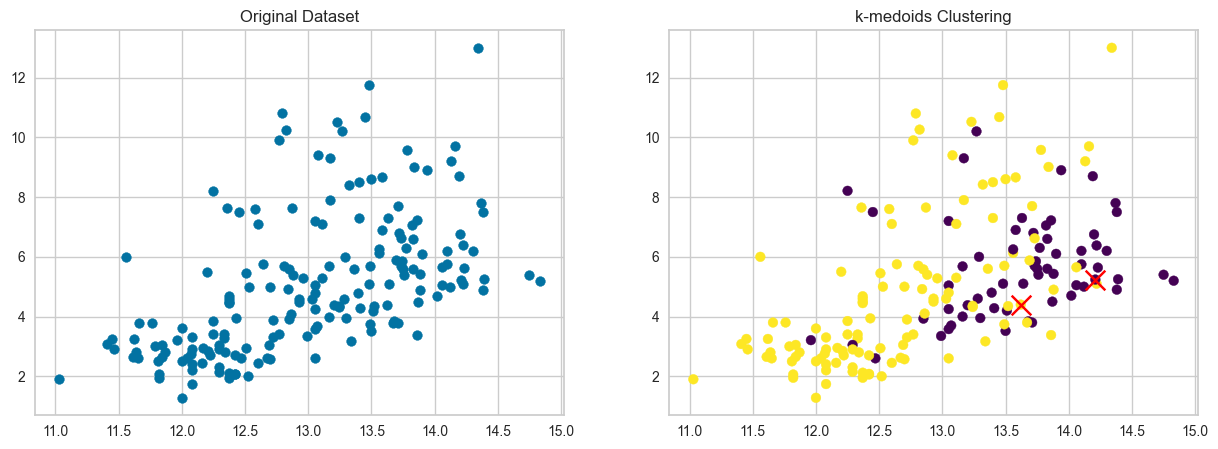

In [76]:
kmedoids_model =  KMedoids(n_clusters=2, random_state=42)
y_pred = kmedoids_model.fit_predict(X)

plt.figure(figsize = (15,5))

plt.subplot(121)
plt.scatter(X.iloc[:,0],X.iloc[:,9])
plt.title("Original Dataset")

plt.subplot(122)
plt.scatter(X.iloc[:, 0], X.iloc[:, 9], c = kmedoids_model.labels_, cmap='viridis')
plt.scatter(kmedoids_model.cluster_centers_[:, 0], kmedoids_model.cluster_centers_[:, 9], c='red', marker='x', s=200)
plt.title("k-medoids Clustering")
plt.show()

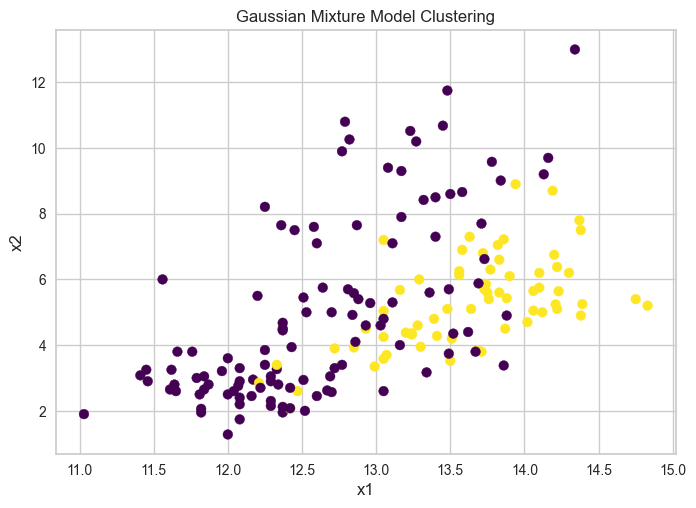

In [86]:
gmm = GaussianMixture(n_components=2, random_state=123)
gmm.fit(X)
labels = gmm.predict(X)

# plot the data colored by cluster assignment
plt.scatter(X.iloc[:, 0], X.iloc[:, 9], c=labels, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

Based on the plots, GMMs algorithm can better differentiate between the clusters as the data points that belong to the same cluster are distributed closer to each other.

KMeans algorithm can handle large datasets efficiently and works well when clusters are well-separated and have similar sizes. However, it requires that the number of clusters to be specified beforehand and It is sensitive to the initial choice of centroids.

KMedoids algorithm is robust to noise and outliers and does not require the assumption of a specific distribution. On the other hand, it is computationally expensive, especially for large datasets. Similar to KMeans, requires the number of clusters to be specified beforehand, and it is sensitive to the initial choice of medoids.

GMMs algorithm can handle clusters with different shapes and sizes. Can estimate the probability of a data point belonging to each cluster, and allows for soft clustering, where a data point can belong to multiple clusters. Nevertheless, it is computationally expensive, especially for large datasets.
Requires estimating the covariance matrix, which can be challenging when the dimensionality is high or the data is sparse. Also, it is prone to overfitting when the number of components is too large.

If the goal is to identify distinct groups of wines based on their chemical composition and some prior knowledge suggests that there are three classes of wines, KMeans or GMMs with three components could be suitable choices. If the data is noisy or contains outliers, KMedoids could be a more robust option.